In [7]:
ls 'drive/My Drive/Spark cs506/Dataset/Boston_Certified_Businesses'

'boston_restaurants _googleAPI.csv'   food_inspections.csv
 Category_Codes.csv                   google_place_API.ipynb
 Certified_Business_dic.csv


# Deep Understanding Inspections dataset

In [8]:
import pandas as pd 

dir = 'drive/My Drive/Spark cs506/Dataset/Boston_Certified_Businesses/'
df_Inspections = pd.read_csv(dir+'food_inspections.csv')


df_Inspections.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,businessname,dbaname,legalowner,namelast,namefirst,licenseno,issdttm,expdttm,licstatus,licensecat,descript,result,resultdttm,violation,viollevel,violdesc,violdttm,violstatus,statusdate,comments,address,city,state,zip,property_id,location
0,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,2013-04-05 12:47:23,2020-12-31 23:59:00,Active,FS,Eating & Drinking,HE_Fail,2013-02-15 12:19:42,15-4-202.16,*,Non-Food Contact Surfaces,2013-02-15 12:19:42,Fail,NaN,Provide glass storage rack.,635 Hyde Park AVE,Roslindale,MA,02131,77476.0,"(42.278590000, -71.119440000)"
1,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,2013-04-05 12:47:23,2020-12-31 23:59:00,Active,FS,Eating & Drinking,HE_Fail,2013-02-15 12:19:42,16-4-501.11/.15,*,Dishwashng Facilities,2013-02-15 12:19:42,Fail,NaN,Provide dish rack over 3 bay sink to replace m...,635 Hyde Park AVE,Roslindale,MA,02131,77476.0,"(42.278590000, -71.119440000)"
2,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,2013-04-05 12:47:23,2020-12-31 23:59:00,Active,FS,Eating & Drinking,HE_Fail,2013-02-15 12:19:42,16-4-501.11/.15,*,Dishwashng Facilities,2013-02-15 12:19:42,Fail,NaN,Provide dish washer at ware washing area.,635 Hyde Park AVE,Roslindale,MA,02131,77476.0,"(42.278590000, -71.119440000)"
3,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,2013-04-05 12:47:23,2020-12-31 23:59:00,Active,FS,Eating & Drinking,HE_Fail,2013-02-15 12:19:42,29-5-201/02.11,*,Installed and Maintained,2013-02-15 12:19:42,Fail,NaN,Provide mop sink at basement.,635 Hyde Park AVE,Roslindale,MA,02131,77476.0,"(42.278590000, -71.119440000)"
4,100 Percent Delicia Food,NaN,BRENNAN PATRICK E,Marte,Civelis,87059,2013-04-05 12:47:23,2020-12-31 23:59:00,Active,FS,Eating & Drinking,HE_Fail,2013-02-15 12:19:42,31-5-204/05.11,***,Location Accessible,2013-02-15 12:19:42,Fail,NaN,No hand sink at Bar Area provide.,635 Hyde Park AVE,Roslindale,MA,02131,77476.0,"(42.278590000, -71.119440000)"


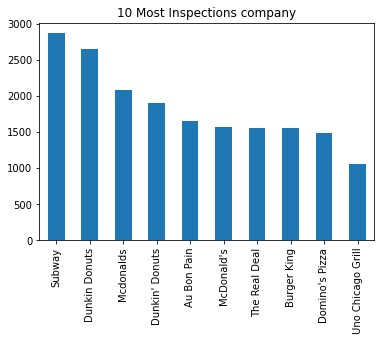

In [19]:
import matplotlib.pyplot as plt
plt.title('10 Most Inspections company')
df_Inspections['businessname'].value_counts(sort=True).nlargest(10).plot.bar()

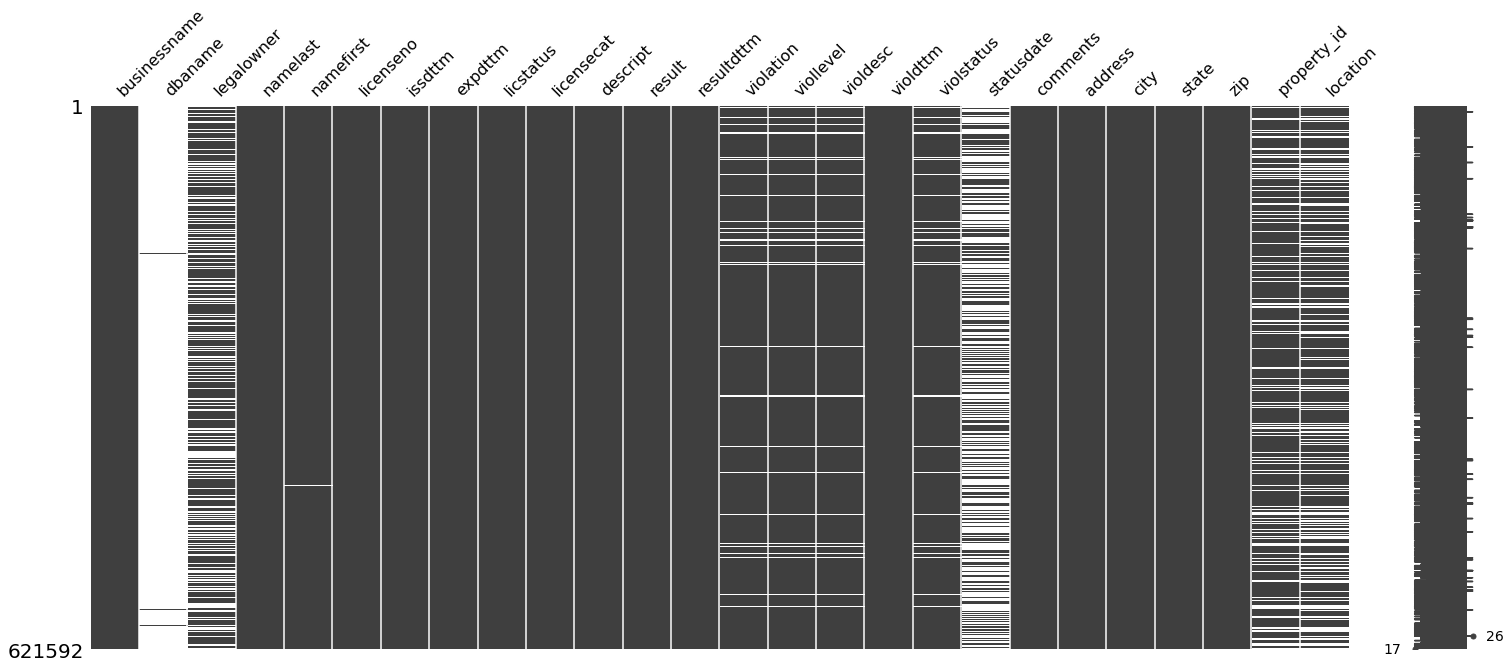

In [63]:
import missingno as msno 
msno.matrix(df_Inspections) 

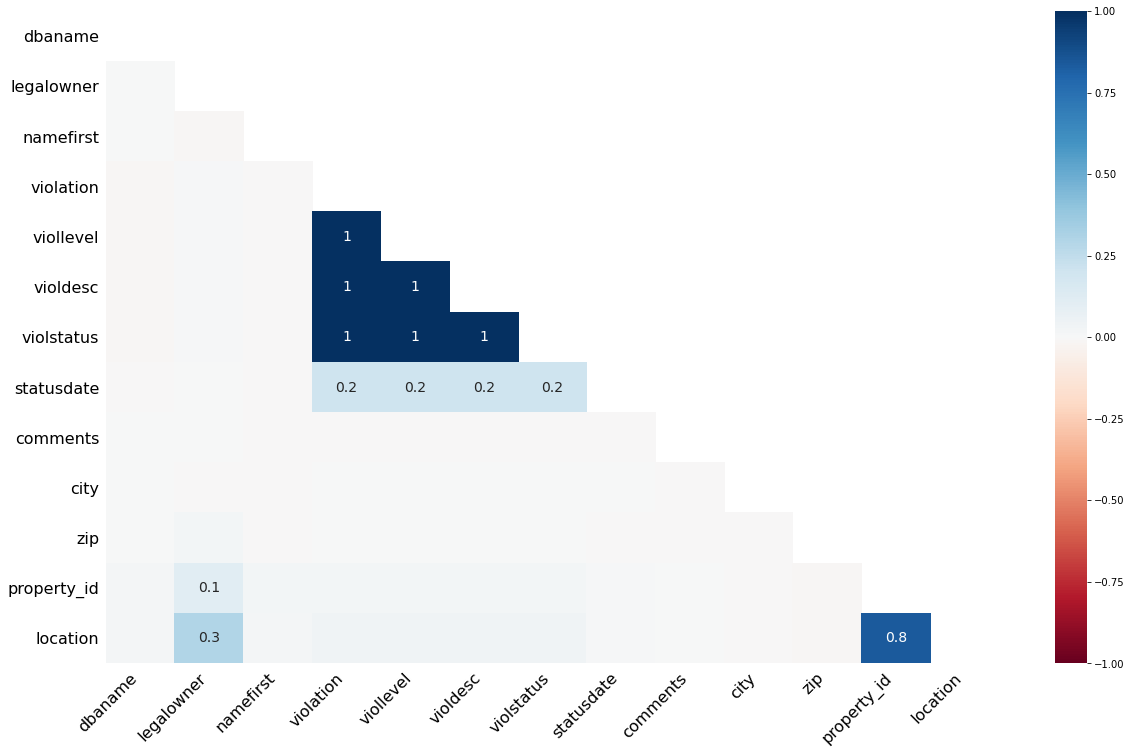

In [64]:
msno.heatmap(df_Inspections) 

# License Expired Company

In [42]:
df_new = pd.DataFrame.copy(df_Inspections)
expdttm =[]
for i in df_new['expdttm']:
  try:
    expdttm.append(pd.to_datetime(i))
  except:
    expdttm.append(pd.NA)
df_new['expdttm'] = expdttm

In [113]:
expired_restaurants=  df_new[df_new['expdttm']> pd.datetime.now()]
valid_restaurants = df_new[df_new['expdttm']<= pd.datetime.now()]

# Set expired- valid&expired
real_expired = set(expired_restaurants['businessname'])-  set(valid_restaurants['businessname'])
# real_expired


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


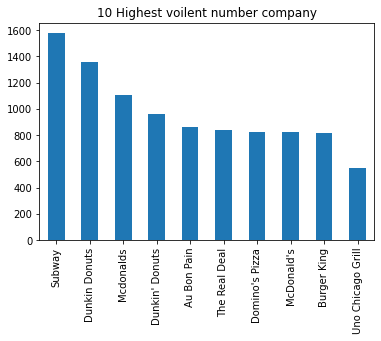

In [81]:
violate=  df_new[df_new['violstatus'] == 'Fail']

plt.title('10 Highest violate number company')
violate['businessname'].value_counts(sort=True).nlargest(10).plot.bar()

In [118]:

violate_dic ={}
expired_dic ={}
for name in violate['businessname']:
  if name in volient_dic:
    violate_dic[name] += 1
  else:
    violate_dic[name]= 1 

for name in set(df_new['businessname']):
  if name not in violate_dic:
    violate_dic[name] = 0
  if name in real_expired:
    expired_dic[name]= False
  else:
    expired_dic[name]= True

# expired_dic


In [121]:
df_Restaurants = pd.read_csv(dir+'boston_restaurants _googleAPI.csv')

violate_no=[]
expired=[]
# pd.NA 

for name in df_Restaurants['name']:
  if name in violate_dic:
    violate_no.append( violate_dic[name] )
  else:
    violate_no.append(pd.NA)
  
  if name in expired_dic:
    expired.append( expired_dic[name] )
  else:
    expired.append(pd.NA)
df_Restaurants [ 'violate_no'] = violate_no
df_Restaurants [ 'expired'] = expired



In [122]:
df_Restaurants.head()

,name,lat,lng,vicinity,business_status,permanently_closed,rating,user_ratings_total,source,type,volient_no,expired
0,Tony's Clam Shop,42.275225,-71.005996,"861 Quincy Shore Drive, Quincy",CLOSED_TEMPORARILY,True,4.3,1609,GOOGLE,"restaurant,food,point_of_interest,establishment",<NA>,<NA>
1,Great Chow,42.267550,-71.016866,"17 Beale Street, Quincy",OPERATIONAL,False,3.9,147,GOOGLE,"meal_delivery,restaurant,food,point_of_interes...",<NA>,<NA>
2,La Paloma Mexican Restaurant,42.269169,-71.024356,"195 Newport Avenue, Quincy",OPERATIONAL,False,4.2,545,GOOGLE,"restaurant,food,point_of_interest,establishment",<NA>,<NA>
3,Chipotle Mexican Grill,42.272584,-71.027265,"60 Newport Avenue, Quincy",OPERATIONAL,False,3.9,627,GOOGLE,"restaurant,food,point_of_interest,establishment",142,False
4,China Jade,42.269307,-71.024366,"195 Newport Avenue, Quincy",OPERATIONAL,False,3.5,42,GOOGLE,"meal_delivery,restaurant,food,point_of_interes...",<NA>,<NA>


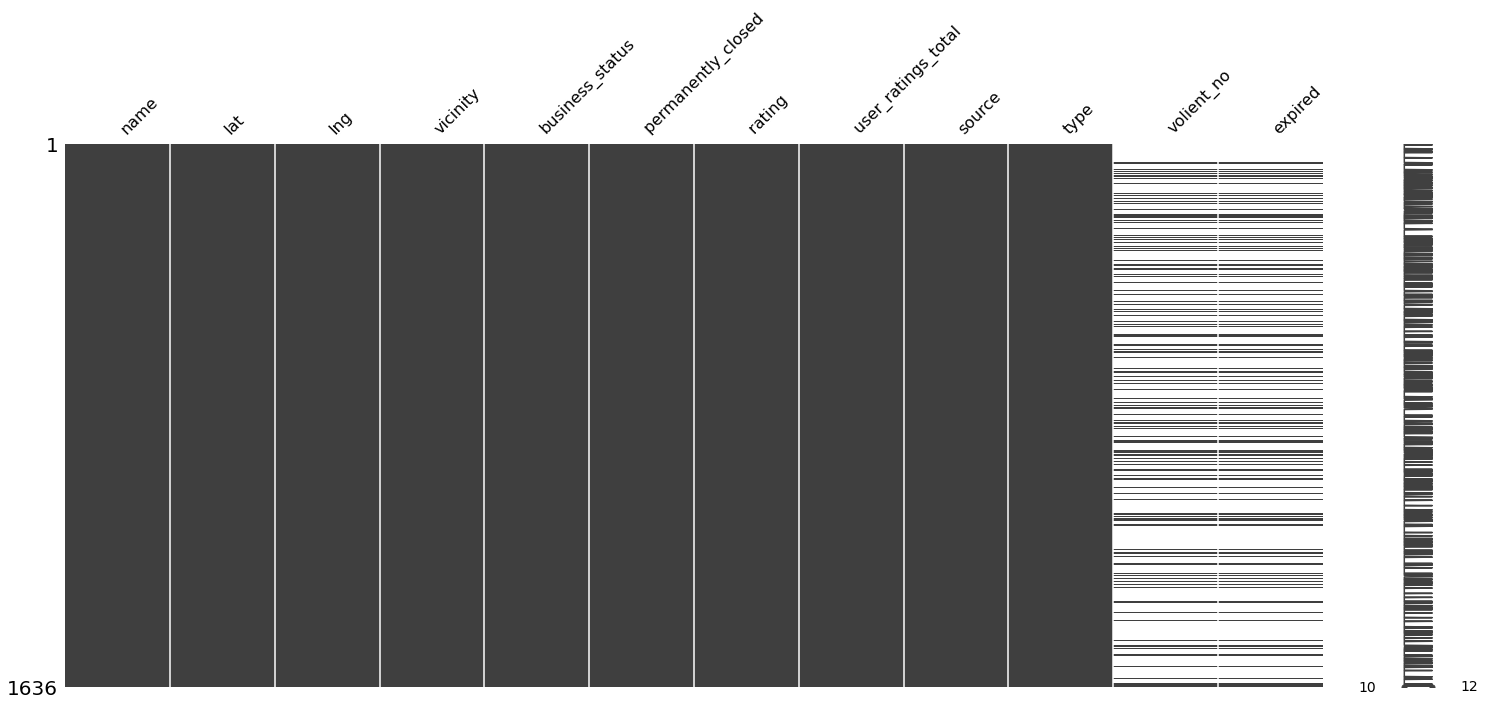

In [123]:
msno.matrix(df_Restaurants) 

In [125]:
df_Restaurants.to_csv('boston_restaurants_Inspection.csv')